In [1]:
!pip install opencv-python

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#for splitting the data
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import cv2

In [2]:
import os

#path of the cwd.
path=os.getcwd()
print(path)

#to get the list of all the files/directories in the cwd.
dir_list = os.listdir(r'C:\Users\sejal\Desktop\svm\Lung Disease Dataset\train')

print("---------------------------------------------------------------------------------------")

print("'files and directories in'",r'C:\Users\sejal\Desktop\svm\Lung Disease Dataset\train',"':'")
print(dir_list)

classes = {'bacterial_pneumonia':1,'corona_virus':2,'normal':0,'tuberculosis':3,'viral_pneumonia':4}

C:\Users\sejal\Desktop\svm
---------------------------------------------------------------------------------------
'files and directories in' C:\Users\sejal\Desktop\svm\Lung Disease Dataset\train ':'
['Bacterial Pneumonia', 'Corona Virus Disease', 'Normal', 'Tuberculosis', 'Viral Pneumonia']


In [6]:
import cv2

#X and Y are lists.
X = []
Y = []

for cls in classes:
    
    if cls=="bacterial_pneumonia":
       pth=r"C:\Users\sejal\Desktop\svm\Lung Disease Dataset\train\Bacterial Pneumonia"
    elif cls=="corona_virus":
       pth=r"C:\Users\sejal\Desktop\svm\Lung Disease Dataset\train\Corona Virus Disease"
    elif cls=="normal":
       pth=r"C:\Users\sejal\Desktop\svm\Lung Disease Dataset\train\Normal"
    elif cls=="tuberculosis":
       pth=r"C:\Users\sejal\Desktop\svm\Lung Disease Dataset\train\Tuberculosis"
    elif cls=="viral_pneumonia":
       pth=r"C:\\Users\\sejal\\Desktop\\svm\\Lung Disease Dataset\\train\\Viral Pneumonia"
    
    print(cls)

        
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j,0)
        # 0 here is to read image in grayscale mode.
     #
        img = cv2.resize(img,(200,200))
        #(200,200) follows the order (width,height).
        
        #append() inserts its argument as a single element to the end of the list.
        #the length of the list increases by one.
        X.append(img)
        Y.append(classes[cls])

bacterial_pneumonia
corona_virus
normal
tuberculosis
viral_pneumonia


In [14]:
#the lists(here,X and Y) are passed to the array() method which then returns a NumPy array with the same elements.
X = np.array(X)
print(np.array(X))
Y = np.array(Y)
print(np.array(Y))


X_updated = X.reshape(len(X), -1)


[[[ 43  46  49 ...  19  24  69]
  [ 43  47  49 ...  20  23  63]
  [ 44  47  50 ...  20  22  55]
  ...
  [ 22  22  21 ...  24  27  30]
  [ 21  22  21 ...  24  27  30]
  [ 21  22  21 ...  24  27  30]]

 [[  2   2   2 ...  20  20  20]
  [  2   2   2 ...  20  20  20]
  [  3   3   3 ...  20  20  20]
  ...
  [  8   6   8 ...  15  15  14]
  [  8   5   7 ...  15  14  14]
  [  8   5   7 ...  15  14  14]]

 [[ 64  52  49 ...   0   0   0]
  [ 62  52  48 ...   0   0   0]
  [ 57  53  47 ...   0   0   0]
  ...
  [ 32  38  35 ...  47  47  47]
  [ 31  38  34 ...  47  47  47]
  [ 31  40  34 ...  47  47  47]]

 ...

 [[ 87  91  93 ...  78  76  75]
  [ 91  98  96 ...  83  80  77]
  [ 92  98  96 ...  85  83  83]
  ...
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[ 83  84  87 ... 119 114 112]
  [ 80  81  87 ... 123 123 115]
  [ 78  84  82 ...  96 104 120]
  ...
  [  4   4   3 ...  69  46  36]
  [  4   4   3 ...  72  51  38]
  [  3   3   3 ...  73  58  

In [17]:
X.ndim

3

In [18]:
X.shape

(6054, 200, 200)

In [16]:
X_updated.shape

(6054, 40000)

In [20]:
np.array(X_updated)

array([[43, 46, 49, ..., 24, 27, 30],
       [ 2,  2,  2, ..., 15, 14, 14],
       [64, 52, 49, ..., 47, 47, 47],
       ...,
       [87, 91, 93, ...,  0,  0,  0],
       [83, 84, 87, ..., 73, 58, 40],
       [ 2,  1,  1, ...,  1,  1,  1]], dtype=uint8)

In [25]:
Y.ndim

1

In [19]:
np.unique(Y)

array([0, 1, 2, 3, 4])

In [31]:
pd.Series(Y).value_counts()

3    1220
2    1218
0    1207
1    1205
4    1204
dtype: int64

In [13]:
X.shape, X_updated.shape

((6054, 200, 200), (6054, 40000))

# Visualise Data

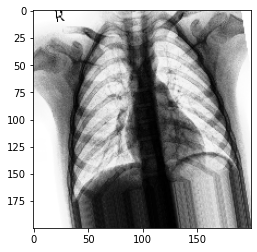

In [24]:
plt.imshow(X[3453], cmap='Greys')

# Split Data

In [29]:
xtrain,xtest,ytrain,ytest=train_test_split(X_updated,Y,random_state=10,test_size=.20)

In [31]:
xtrain.shape,xtest.shape

((4843, 40000), (1211, 40000))

# Feature Scaling

In [32]:
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())
xtrain=xtrain/xtrain.max()
xtest=xtest/xtest.max()
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


# Feature Selection

In [18]:
from sklearn.decomposition import PCA

In [19]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)

pca_train = xtrain
pca_test = xtest

(4843, 40000) (1211, 40000)


# Train Model

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [21]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(xtrain, ytrain)

LogisticRegression(C=0.1)

In [22]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(xtrain, ytrain)

SVC()

# Evaluation

In [67]:
print("Training Score:", lg.score(xtrain,ytrain))
print("Testing Score:", lg.score(xtest,ytest))

Training Score: 0.755729919471402
Testing Score: 0.6358381502890174


In [23]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.858765228164361
Testing Score: 0.7696118909991743
